# Jupyter Notebook for analysis of 'tips' dataset

This Notebook examines data collected by one waiter who recorded tips received in a restaurant over a period of several months, along with 6 other entities Total Bill, Sex, Smoker, Day, Time and Size (ref https://www.kaggle.com/jsphyg/tipping). 

Total Bill - the overall bill for the meal  
Sex        - the gender of the person paying the bill  
Smoker     - shows if someone was smoking in the group (or by themselves for people on their own)  
Day        - day of the week : Thu, Fri, Sat or Sun  
Time       - Lunch or Dinner  
Size       - how many people were in the group


It should be noted that conclusions should not be drawn from this dataset about tip giving generally (or any of the other recorded factors). Interesting points however may be highlighted for further investigation, or to corroborate conclusions drawn by data gathered elsewhere.  

Simply step through the cells in the Notebook sequentially to perform the anaylsis.  

To start, import Python packages used for data analysis

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Get the dataset 'tips' from Seaborn into a dataframe, extract the columnames (for use in analysis) and display them.  
(ref https://stackoverflow.com/questions/30336324/seaborn-load-dataset)

In [2]:
df = sns.load_dataset('tips')
columnNames = list(df.head(0))
print(columnNames)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


The index values (which will be used in the code) for the columnnames are :
total_bill = 0
tip = 1
sex = 2
smoker = 3
day = 4
time = 5
party_size = 6


## Part 1 - Overall evaluation of variables

In [ ]:
Display the full dataset. We need to use the pandas set_option, otherwise the output is truncated.
(ref https://stackoverflow.com/questions/49188960/how-to-show-all-of-columns-name-on-pandas-dataframe)

In [3]:
pd.set_option('display.max_rows',len(df.index))
pd.set_option('display.max_columns', None)
print(df)

     total_bill    tip     sex smoker   day    time  size
0         16.99   1.01  Female     No   Sun  Dinner     2
1         10.34   1.66    Male     No   Sun  Dinner     3
2         21.01   3.50    Male     No   Sun  Dinner     3
3         23.68   3.31    Male     No   Sun  Dinner     2
4         24.59   3.61  Female     No   Sun  Dinner     4
5         25.29   4.71    Male     No   Sun  Dinner     4
6          8.77   2.00    Male     No   Sun  Dinner     2
7         26.88   3.12    Male     No   Sun  Dinner     4
8         15.04   1.96    Male     No   Sun  Dinner     2
9         14.78   3.23    Male     No   Sun  Dinner     2
10        10.27   1.71    Male     No   Sun  Dinner     2
11        35.26   5.00  Female     No   Sun  Dinner     4
12        15.42   1.57    Male     No   Sun  Dinner     2
13        18.43   3.00    Male     No   Sun  Dinner     4
14        14.83   3.02  Female     No   Sun  Dinner     2
15        21.58   3.92    Male     No   Sun  Dinner     2
16        10.3

We'll change the name of the last column to 'party_size' just to make it clearer what it is:  
(ref https://www.google.com/searchq=python+change+dataset+column+name&rlz=1C1AVFC_enIE848IE849&oq=python+change+dataset+column+name&aqs=chrome..69i57j33l2.12423j0j7&sourceid=chrome&ie=UTF-8)

In [4]:
df=df.rename(columns = {'size':'party_size'})
columnNames = list(df.head(0))
print(columnNames)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'party_size']


Get the basic statistical values for the numeric variables total_bill, tip and party_size :

In [5]:
df.describe()

,total_bill,tip,party_size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Above we see how many records there are (240), the means for the numerical variables, standard deviation (std), minimum and maximum values (min & max), and the interquartile range values - the amounts below which eg 25% of the values lie, for example 25% of values for Total Bill are below $13.35.  
It is evident from the standard deviations (measure of spread), that there is wide variation for each variable, with the standard deviation for each being only a little below half the mean value. This will become more evident when we look at plots later.  

Next, find the average value of a tip as a percentage of the total bill :
(ref https://stackoverflow.com/questions/41286569/get-total-of-pandas-column)

In [6]:
percent = round((100*(df['tip'].sum()/df['total_bill'].sum())),2)
print(percent)

15.15


So on average tips are paid at roughly 15% of the total bill.

Plot the total bill values against the tip values (see the following plot).   
(ref https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850)  
There is, as might be expected, a correlation, but with plenty of noise. 

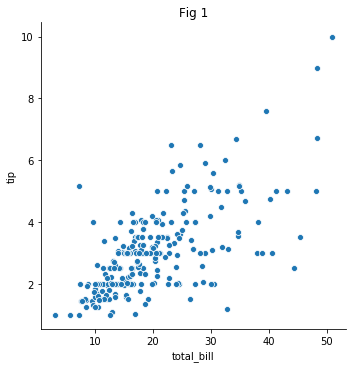

In [7]:
sns.set
sns.relplot(x=columnNames[0],y=columnNames[1],data=df)
plt.title('Fig 1')
plt.show()

For the same type of plot, include each of the other non-numeric variables (gender, smoker, day, time) to see if any of them strongly influence either the total spend or the tip amount.  
  
First - _gender_

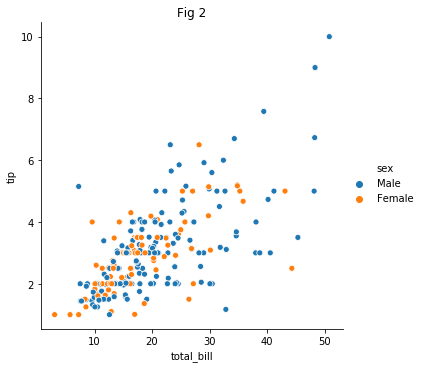

In [8]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[2],data=df)
plt.title('Fig 2')
plt.show()

The largest bills are principally paid by males (12 of the highest 14), and outlying tips (on the high side) are also mostly paid by males (9 of the top 10). The 3 smallest bills are for females, but outside of these extremes, which represent about 1/10th of the total, there is little to distinguish the genders. There are 2 tips that are disproportionately high relative to the total bill, one paid by a male, the other by a female.   

Now check whether having a _smoker_ in the party influences the bill or the tip : 

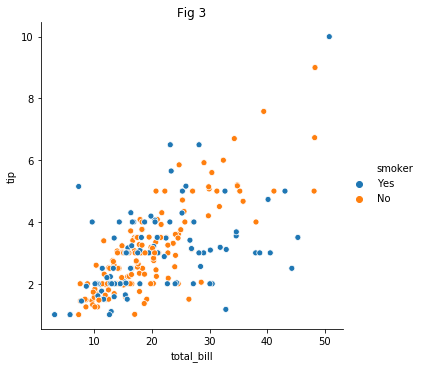

In [9]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[3],data=df)
plt.title('Fig 3')
plt.show()

The clearest distinguishing feature here is that for the highest values of total bill the non-smokers tend to give higher tips than the smokers, although the highest tip of all is paid by a smoker. Up to a total bill of roughly 27 dollars, there is little difference between the two. The two outstanding tips (highest) as a proportion of the total bill though were paid by smokers. 

Next, check the _day of the week_ :

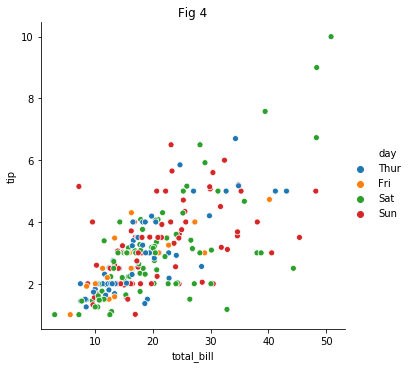

In [10]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[4],data=df)
plt.title('Fig 4')
plt.show()

Of the highest 14 total bills, the majority come from Saturdays and Sundays, with half of them from Saturday, and 4 from Sunday. Bills on Friday are lower than on other days, with only 1 in the top 37.
For total bills below about 30 dollars the day doesn't greatly influence the bill. 

Now check between _lunch and dinner time_ :

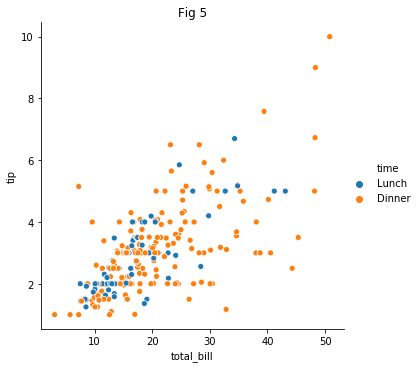

In [11]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[5],data=df)
plt.title('Fig 5')
plt.show()

As might be expected, the highest bills are mostly from dinner time, with 12 of the highest 14. There is also a strong pattern though of the lower and higher tips being given at dinner time, with those at lunch time being closer to the mean. 

Finally we'll examine the influence of _party size_. Include 'legend="full"' so that all of the party sizes are shown, otherwise, with party-size being numeric relplot groups them into evenly spaced values, with the legend showing values of 0, 2, 4, 6  
(ref https://seaborn.pydata.org/generated/seaborn.scatterplot.htmlFirst).   
Plot as a simple entity, and then as the total bill and tip per person:

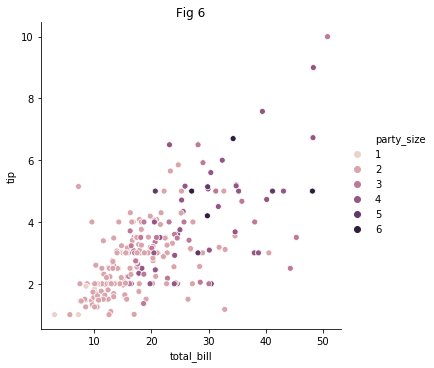

In [12]:
sns.relplot(x=columnNames[0],y=columnNames[1],hue=columnNames[6],data=df,legend="full")
plt.title('Fig 6')
plt.show()

As might be expected, the lower value of total bills are dominated by the smaller parties.  
Now plot the values _per person_ (make sure you've changed the name of the 'size' column up above 
to 'party_size', otherwise this will fail):  
(ref https://stackoverflow.com/questions/35439613/python-pandas-dividing-column-by-another-column)

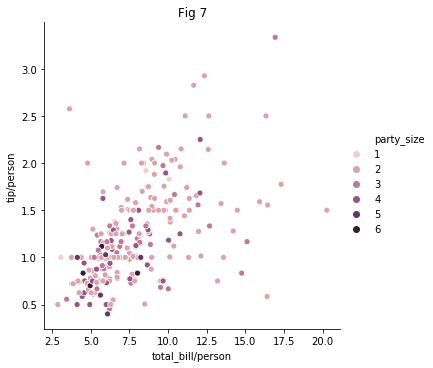

In [13]:
df['tip/person'] = df['tip']/df['party_size']
df['total_bill/person'] = df['total_bill']/df['party_size']
columnNames = list(df.head(0))
sns.relplot(x=columnNames[8],y=columnNames[7],hue=columnNames[6],data=df,legend="full")
plt.title('Fig 7')
plt.show()

The plot shows that the total bill per person for larger parties is significantly lower than for smaller parties, as is the tip per person. The average values for total_bill and tip per person based on party size are :    
(ref https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas)  
(ref https://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decimal-places)

In [14]:
mean_list=list(df.groupby(columnNames[6])[columnNames[7]].mean())
means = [ round(elem, 2) for elem in mean_list ]
print ("Mean values of Total Bill per person by party size",  means)
mean_list=list(df.groupby(columnNames[6])[columnNames[8]].mean())
means = [ round(elem, 2) for elem in mean_list ]
print ("Mean values of Tip per person by party size",  means)

Mean values of Total Bill per person by party size [1.44, 1.29, 1.13, 1.03, 0.81, 0.87]
Mean values of Tip per person by party size [7.24, 8.22, 7.76, 7.15, 6.01, 5.8]


These values reinforce the picture presented in Fig 7, with a 2 person party paying on average 42% more per person than in a party of 6, and a single person giving a tip that is 78% higher than the tip given per person in a party of 5.  
Finally, we'll plot all the numerical type variables (total_bill, tip and party size) against each other in the one figure:

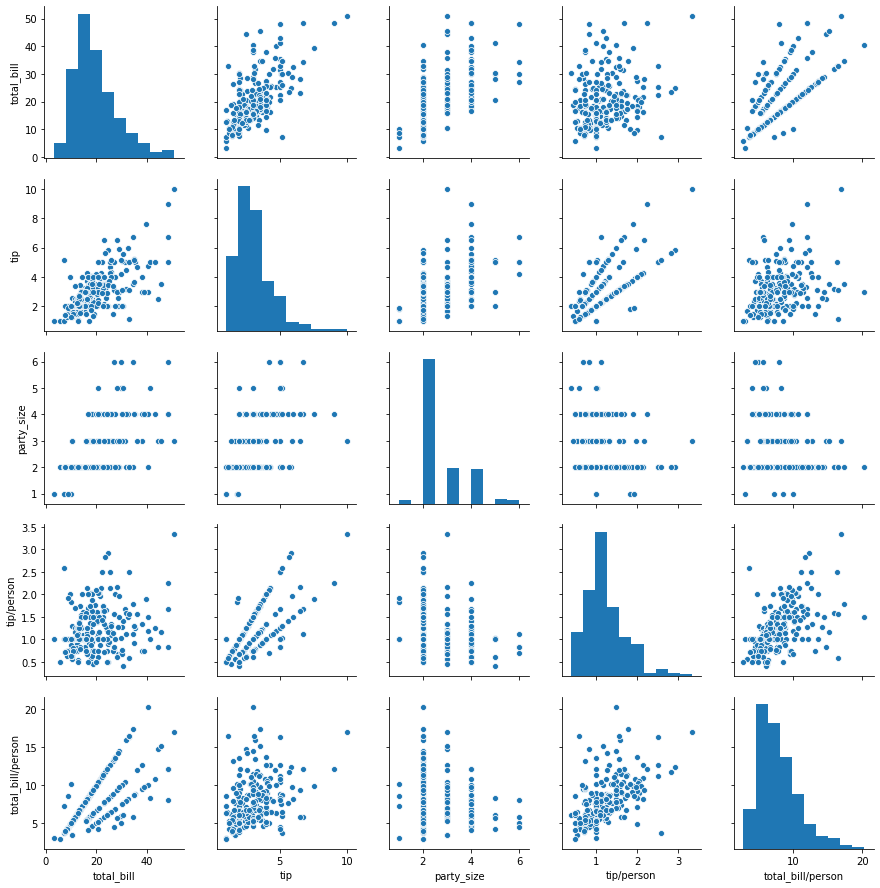

In [15]:
sns.pairplot(df)
plt.show()

The histogram plot of party-size shows that 2 person parties are by far the most common, and the skew of the total_bill and tip histograms illustrate that lower cost meals (and associated tips) are more common than higher cost ones.

## Part 2 Analysis of relationship between total_bill and tip

Before checking whether or not there is a statistically significant correlation between total_bill and tip we need to examine the distribution of each variable - this determines which type of statistical tests are appropriate for assessing correlation, and depend upon how 'Normal' the distributions are (clumped around a central mean value with small numbers of outliers). First look at a histogram plot of some random values generated to be normally distributed :  
(ref https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html)

(array([  13.,   70.,  334.,  958., 1431., 1297.,  641.,  214.,   38.,
           4.]),
 array([-3.661904  , -2.89567703, -2.12945005, -1.36322308, -0.59699611,
         0.16923086,  0.93545783,  1.7016848 ,  2.46791177,  3.23413874,
         4.00036571]),
 <a list of 10 Patch objects>)

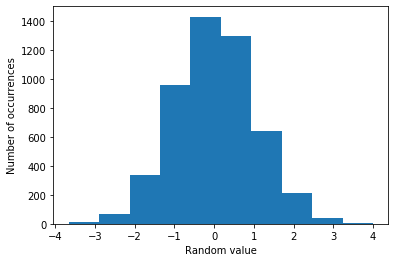

In [16]:
import numpy as np
plt.xlabel('Random value')
plt.ylabel('Number of occurrences')
plt.hist(np.random.randn(5000))

Now plot histograms of the total_bill and the tip data :

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

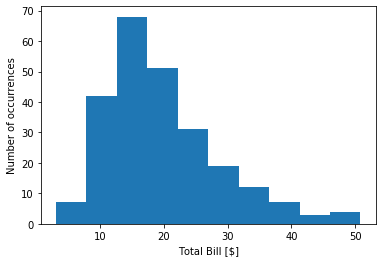

In [17]:
plt.xlabel('Total Bill [$]')
plt.ylabel('Number of occurrences')
plt.hist(df['total_bill'])

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

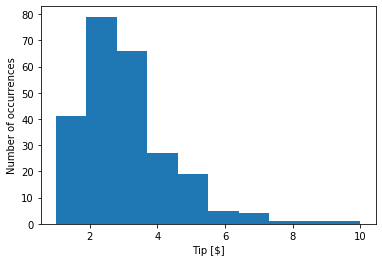

In [18]:
plt.xlabel('Tip [$]')
plt.ylabel('Number of occurrences')
plt.hist(df['tip'])

Both of these plots are clearly skewed towards the lower ends of the range, so it appears that they do not fit the Normal (also called Gaussian) distribution. Carry out a statistical test also, just to confirm this - the Shapiro-Wilks test. This test returns a value (the p-value, a measure of how probable it is that a result is obtained), that if it is greater than a given threshold indicates that the data are Normal, and if it is less than the threshold that the data are not Normal :  
(ref https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

In [19]:
from scipy.stats import shapiro
stat, p = shapiro(df['total_bill'])
if p > 0.05:
	print('Total_bill data look Normal')
else:
	print('Total_bill data do not look Normal')
stat, p = shapiro(df['tip'])
if p > 0.05:
	print('Tip data look Normal')
else:
	print('Tip data do not look Normal')

Total_bill data do not look Normal
Tip data do not look Normal


The Shapiro-Wilks test confirms the impression provided by the histograms that neither of the variables are Normally distributed. However, the general shape of the two histograms is similar. 
Now use a statistical test designed to measure the correlation between two non-Normally distributed variables - the Spearmann test:  

(ref https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)

In [20]:
from scipy.stats import spearmanr
coef, p = spearmanr(df['total_bill'], df['tip'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Data are uncorrelated p=%.3f' % p)
else:
	print('Data are correlated p=%.3f' % p)

Spearmans correlation coefficient: 0.679
Data are correlated p=0.000


The coefficient value of 0.679 indicates a strong positive correlation between the values of total-bill and tip (as might be expected given societal norms). The range used for the coefficient is -1 to 1, with -1 indicating a perfect negative correlation, 0 no correlation, and 1 a perfect positive correlation. The 'p' value of 0 indicates that the observed values are unlikely to be due to chance.  
(ref https://geographyfieldwork.com/SpearmansRankCalculator.html)  
(ref https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php)  

Get the best fit line for the 2 variables, and plot it to demonstrate how spread out from this the actual values are. 'np.polyfit' from the 'numpy' package calculates the slope (m) of the best fit line, and where it intersects the y-axis (c) :  
(ref Fundamentals of Data Analysis course notes)

0.10502451738435338
0.9202696135546737


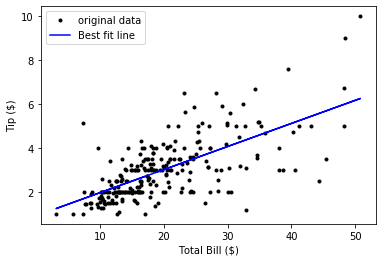

In [21]:
import numpy as np
m,c = np.polyfit(df['total_bill'], df['tip'],1)
print(m)
print(c)
plt.plot(df['total_bill'], df['tip'],'k.',label='original data')
plt.plot(df['total_bill'],m*df['total_bill']+c,'b-',label='Best fit line')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.legend()
plt.show()

This best fit line could be used to predict an estimated tip based on a given total bill, but given how spread out from the line actual tip values are it is unlikely to be an accurate prediction.  

## Part 3 Further analysis of the relationships between variables  

Lets start by adding a new column to the data - the tip percent (the tip as a percentage of the total bill). We saw earlier that the average tip was about 15%. See what the tip percents look like in a histogram : 

(array([ 6., 25., 42., 78., 60., 20.,  7.,  3.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 3.56381359,  6.93734704, 10.3108805 , 13.68441396, 17.05794742,
        20.43148088, 23.80501434, 27.1785478 , 30.55208125, 33.92561471,
        37.29914817, 40.67268163, 44.04621509, 47.41974855, 50.79328201,
        54.16681547, 57.54034892, 60.91388238, 64.28741584, 67.6609493 ,
        71.03448276]),
 <a list of 20 Patch objects>)

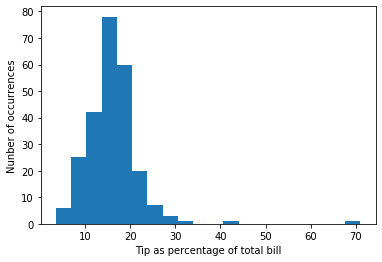

In [22]:
df['tip_percent'] = (df['tip']*100)/df['total_bill']
columnNames = list(df.head(0))
plt.xlabel('Tip as percentage of total bill')
plt.ylabel('Nunber of occurrences')
plt.hist(df['tip_percent'],bins=20)

The histogram clearly illustrates the two high value tips (in percentage terms), and how the great majority are clustered in the range from about 8% to 22%.  
Now lets look at the histograms of the total_bill/person and the tip/person, that displayed some strong characteristics. Compare them side by side :

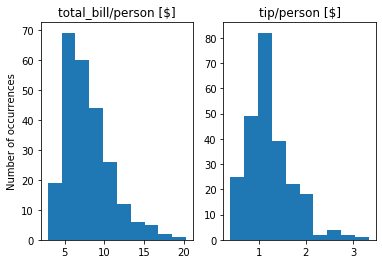

In [23]:
plt.subplot(1,2,1)
plt.ylabel('Number of occurrences')
plt.hist(df['total_bill/person'])
plt.title('total_bill/person [$]')
plt.subplot(1,2,2)
plt.hist(df['tip/person'])
plt.title('tip/person [$]')
plt.show()

Here we see a more Normally distributed type plot for the tip/person than for the total_bill/person (which is skewed to the left (lower values)), indicating that people with lower total bills per person tend to be more generous with tips overall than those with higher bills.  

Lets see how many Males paid the bill, and how many Females
(ref https://stackoverflow.com/questions/35277075/python-pandas-counting-the-occurrences-of-a-specific-value/52426772) :


In [24]:
print('Males',(df.sex == 'Male').sum())
print('Females',(df.sex == 'Female').sum())

Males 157
Females 87


It's about 1/3rd females to 2/3rd males, indicating it is no longer the norm for the male to always pay. Of course, we can't tell from the data whether or not each individual in parties of more than one paid for themselves.  
Let's exclude any parties with just one person - obviously they'll pay for themselves  
(ref https://stackoverflow.com/questions/20995196/python-pandas-counting-and-summing-specific-conditions) :

In [25]:
print('Males',((df.sex == 'Male') & (df.party_size > 1)).sum())
print('Females',((df.sex == 'Female') & (df.party_size > 1)).sum())
print('Number of one person parties ',(df.party_size == 1).sum())

Males 156
Females 84
Number of one person parties  4


There are very few people dining alone, so this isn't significantly affecting the gender balance in terms of who pays.
Next examine the overall sums of total_bill, tip and party_size, as grouped by gender  
(ref https://data-and-design.readthedocs.io/en/latest/02-introPandas.html) :

In [26]:
group = df.groupby("sex")
print(group.sum())


        total_bill     tip  party_size  tip/person  total_bill/person  \
sex                                                                     
Male       3256.82  485.07         413  191.983333        1275.367167   
Female     1570.95  246.51         214  103.930500         649.360833   

        tip_percent  
sex                  
Male    2475.113588  
Female  1448.469406  


The sum of the total bill, tip and party size are all roughly half for cases where the bill is paid by a female as opposed to a male. As the number of males paying is about twice the number of females, the overall totals are all in roughly the same proportion for both genders.

Examine the total bill and tip values by day :  
(ref https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e)  
(ref https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib)

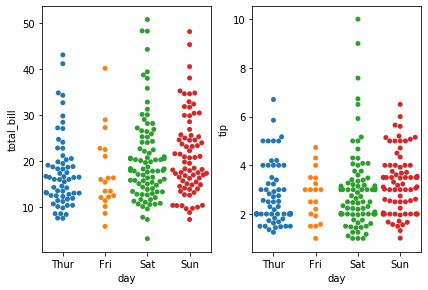

In [27]:
fig, ax =plt.subplots(1,2)
fig.tight_layout()
sns.catplot(x="day", y="total_bill", kind="swarm", data=df, height=4, aspect=2, ax=ax[0])
sns.catplot(x="day", y="tip", kind="swarm", data=df, height=4, aspect=2, ax=ax[1])
plt.close(2)
plt.close(3)

Here we see that the largest total bills tend to be on Saturday and Sunday, with Friday having the lowest bills, and the highest tips are largely given on Saturday.  

Now check how many lunches and dinners were recorded, and the total spend for each :

In [28]:
print('Number of lunch time meals  ',(df.time == 'Lunch').sum())
print('Number of dinner time meals ',(df.time == 'Dinner').sum())
print('')
group = df.groupby("time")
print(group.sum())

Number of lunch time meals   68
Number of dinner time meals  176

        total_bill     tip  party_size  tip/person  total_bill/person  \
time                                                                    
Lunch      1167.47  185.51         164   80.262500           497.4455   
Dinner     3660.30  546.07         463  215.651333          1427.2825   

        tip_percent  
time                 
Lunch   1116.069912  
Dinner  2807.513083  


Nearly 3 times as many dinners are recorded than lunches, which may possibly be an indicator of how busy the area where the restaurant is at lunchtime and at dinnertime, or it may be that the waiter more often works in the evening than during the day - without more information false conclusions could easily be drawn. Barplots of the spending for both mealtimes show a lower spend per meal at lunch than at dinner, as is also illustrated in Fig 5:  
(ref https://seaborn.pydata.org/generated/seaborn.barplot.html)

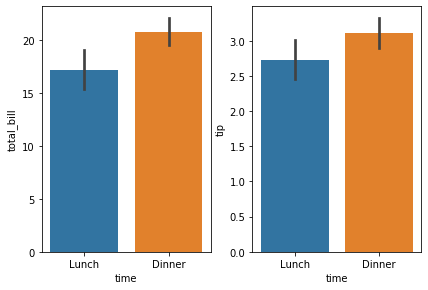

In [29]:
fig, ax =plt.subplots(1,2)
fig.tight_layout()
sns.barplot(x="time", y="total_bill", data=df, ax=ax[0])
sns.barplot(x="time", y="tip", data=df, ax=ax[1])
plt.close(2)
plt.close(3)

Split the dataframe into Lunch and Dinner values, and get the variance for each.  
(ref http://www.datasciencemadesimple.com/variance-function-python-pandas-dataframe-row-column-wise-variance/)

In [30]:
dx_lunch=(df[df.time == 'Lunch'])
dx_dinner=(df[df.time == 'Dinner'])
print(dx_lunch.var())
print(dx_dinner.var())

total_bill           59.503973
tip                   1.452857
party_size            1.081651
tip/person            0.202392
total_bill/person     5.634655
tip_percent          16.193823
dtype: float64
total_bill           83.576697
tip                   2.062793
party_size            0.828539
tip/person            0.257666
total_bill/person     9.459690
tip_percent          45.531643
dtype: float64


We see above that there's greater variance in how much is given in tips at dinner time than at lunch time, but vice versa for the number of people in parties.  

If the bills and the tips paid at lunchtime and at dinnertime are independent, we may apply the T-test to check if there is a statistically significant difference between the mean values of the two variables for the two times of day (with unequal variance being allowed for, as shown above) :  
(ref https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [31]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(dx_lunch.total_bill, dx_dinner.total_bill,equal_var=False)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=-3.123, p=0.002


The p-value of 0.002 means that we would reject the null hypothesis at the 1% threshold of the test that the means for total_bill are equal, ie we would state that the mean values are significantly different. 

In [32]:
stat, p = ttest_ind(dx_lunch.tip, dx_dinner.tip,equal_var=False)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=-2.059, p=0.041


For the tip, with a p value of 0.041, the means are different at the 5% threshold, but not at the 1% 
threshold - ie there is less statistical certainty regarding there being different amounts being given for tips at lunch time than at dinner time, than there is for the total bills being paid.

Compare the amount of variance for the numeric variables where there's a smoker, and where there's no smoker, and also how many parties have smokers :  
(ref http://www.datasciencemadesimple.com/variance-function-python-pandas-dataframe-row-column-wise-variance/)

In [33]:
dx_smoke=(df[df.smoker == 'Yes'])
dx_nosmoke=(df[df.smoker == 'No'])
print('Smoker - variance values :')
print(dx_smoke.var())
print(" ")
print('No smoker - variance values :')
print(dx_nosmoke.var())
print(" ")
print('Number of meals with smokers  ',(df.smoker == 'Yes').sum())
print('Number of meals without smokers  ',(df.smoker == 'No').sum())

Smoker - variance values :
total_bill           96.671256
tip                   1.964111
party_size            0.657317
tip/person            0.313518
total_bill/person    13.152600
tip_percent          72.452775
dtype: float64
 
No smoker - variance values :
total_bill           68.154632
tip                   1.896653
party_size            1.036291
tip/person            0.192138
total_bill/person     4.964959
tip_percent          15.927894
dtype: float64
 
Number of meals with smokers   93
Number of meals without smokers   151


We see little difference in how much variance there is in the value of tips between parties with/without smokers, but those with smokers have a greater spread of total bill values and of party size. It is striking that about 40% of parties have a smoker with them during the meal. However, as stated before, these figures are just from one waiter, and may not reflect figures for the restaurant as a whole. For example, if smokers are required to sit outside, the owner may ask more experienced waiters to serve these parties if they have to negotiate an awkward door - ie the statistics from this waiter may be skewed in relation to the overall statistics for the restaurant.  

Now see if there's much difference in the presence of smokers by day of the week (show raw figures and a plot) :  
(ref https://www.datacamp.com/community/tutorials/pandas-multi-index)  
(ref https://stackoverflow.com/questions/45299305/how-to-plot-pandas-groupby-values-in-a-graph)

smoker  day 
Yes     Thur    17
        Fri     15
        Sat     42
        Sun     19
No      Thur    45
        Fri      4
        Sat     45
        Sun     57
dtype: int64


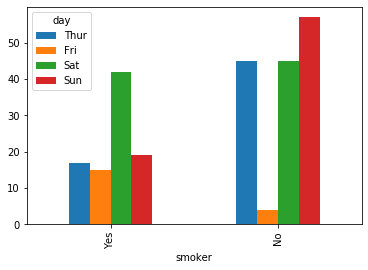

In [34]:
print (df.groupby(['smoker','day']).size())
df.groupby(['smoker','day']).size().unstack(fill_value=0).plot.bar()

There are several interesting points of note here :  
There are many more parties with smokers in on a Friday than without smokers, Saturday sees roughly equal numbers, and Thursday and Sunday see far fewer smoking parties than non-smoking ones. A questionnaire given to smokers might help explain why this is.   

Now check if the gender of who pays differs between the days :  
(ref https://stackoverflow.com/questions/41735149/python-pandas-groupby-calculation)

sex     day 
Male    Thur    30
        Fri     10
        Sat     59
        Sun     58
Female  Thur    32
        Fri      9
        Sat     28
        Sun     18
dtype: int64


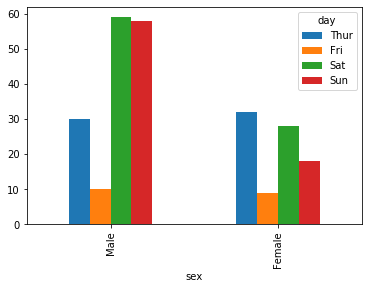

In [35]:
print (df.groupby(['sex','day']).size())
df.groupby(['sex','day']).size().unstack(fill_value=0).plot.bar()

From above, the day of the week appears to have a notable influence on the gender of who pays - on Thursday and Friday it's roughly equally split between male and female, but on Saturday about twice as many bills are paid by males than females, and on Sunday about three times as many. It is unlikely that the gender of who is paying would influence whether or not a particular waiter would serve a given party (unlike possibly for parties containing a smoker). Further information may help to explain this phenomenon, for example the age of the person paying, or the circumstance of the meal (eg is it a meal being taken by colleagues having a break from work, or just after work, or maybe by families visiting a theatre or cinema).  

Finally, lets look at party size by day of the week :

party_size  day 
1           Thur     1
            Fri      1
            Sat      2
2           Thur    48
            Fri     16
            Sat     53
            Sun     39
3           Thur     4
            Fri      1
            Sat     18
            Sun     15
4           Thur     5
            Fri      1
            Sat     13
            Sun     18
5           Thur     1
            Sat      1
            Sun      3
6           Thur     3
            Sun      1
dtype: int64


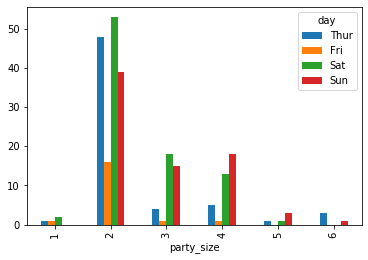

In [36]:
print (df.groupby(['party_size','day']).size())
df.groupby(['party_size','day']).size().unstack(fill_value=0).plot.bar()

There are a very small number of 1,5 and 6 person parties, so we can't draw conclusions about these. There are many more 2 person parties than of any other size, and on Fridays there are very few parties other than 2 person ones. Parties with 3 or 4 people are roughly equally likely on Thursdays, Saturdays and Sundays.


**Conclusion**
Whilst the data from the dataset show some interesting trends, collecting the information more systematically for all staff in the restaurant over a long period of time could potentialy provide a much more useful database.  
The restaurant owner may then be able to spot definite patterns that for example could help them better plan their menus according to day of the week, or month of the year, or to regulate the numbers of waiters required by time of day. Waiters could also check that they are being treated fairly with regard to the tips being received.  
If the data were collected by all restaurants in an area and was openly available it may have wider use still. For example retail outlets could judge the level of disposable income available to people visiting the area, to provide goods in appropriate cost ranges, and planners could determine if applications for new food outlets were appropriate - how saturated the market was for categories of restaurants.